In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from scipy import interpolate
from sabreMod import sosf,sosfn
import json
import strucfunc
import turbustat.statistics as tss


Brillo emisión

Text(0.5, 1.0, 'H$_{α}$ Flux')

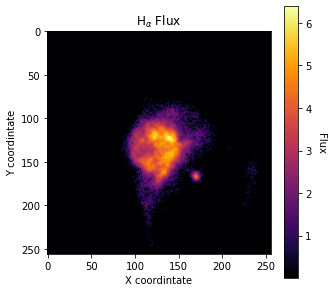

In [3]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.HX.Ha.Peak'
hdul=fits.open(FitsFile + '.fits')
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('H$_{α}$ Flux')

In [4]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,2.729583e-01
std,73.900834,73.900834,8.935073e-01
min,0.000000,0.000000,1.597935e-09
25%,63.750000,63.750000,1.597935e-09
50%,127.500000,127.500000,1.597935e-09
75%,191.250000,191.250000,1.597935e-09
max,255.000000,255.000000,6.391339e+00


Velocidad Radial

Text(0.5, 1.0, 'H$_{α}$ Radial Velocity')

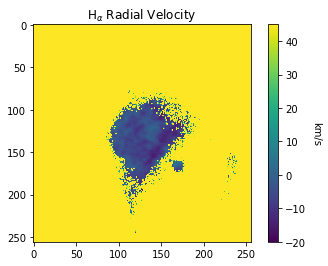

In [5]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.HX.Ha.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('H$_{α}$ Radial Velocity')


In [6]:
vel=hdul[0].data
df=pd.DataFrame(vel)

dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,65536.000000,65536.000000,65536.000000
mean,127.500000,127.500000,245.435674
std,73.900834,73.900834,90.946922
min,0.000000,0.000000,-23.632812
25%,63.750000,63.750000,278.339996
50%,127.500000,127.500000,278.339996
75%,191.250000,191.250000,278.339996
max,255.000000,255.000000,278.339996


In [7]:
data=dfvr
data['I']=dffx.I
data.describe()

,Y,X,RV,I
count,65536.000000,65536.000000,65536.000000,6.553600e+04
mean,127.500000,127.500000,245.435674,2.729583e-01
std,73.900834,73.900834,90.946922,8.935073e-01
min,0.000000,0.000000,-23.632812,1.597935e-09
25%,63.750000,63.750000,278.339996,1.597935e-09
50%,127.500000,127.500000,278.339996,1.597935e-09
75%,191.250000,191.250000,278.339996,1.597935e-09
max,255.000000,255.000000,278.339996,6.391339e+00


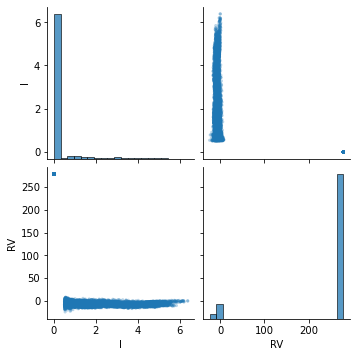

In [8]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [9]:
mI=(data.I>data.I.mean()+0.5*data.I.std())&(data.X<190)
data=data[mI]

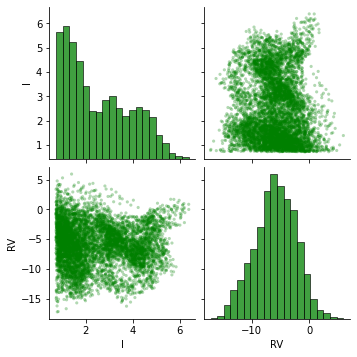

In [10]:
sns.pairplot(data, 
             vars=["I","RV"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='green'),
             diag_kws=dict(bins=20, color="green"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHA.png')

In [11]:
data.describe()

,Y,X,RV,I
count,6925.000000,6925.000000,6925.000000,6925.000000
mean,136.477545,132.964043,-5.948209,2.521570
std,28.541834,22.922061,3.591347,1.364368
min,82.000000,85.000000,-17.226868,0.720783
25%,115.000000,115.000000,-8.254059,1.320395
50%,133.000000,131.000000,-5.865753,2.142590
75%,157.000000,150.000000,-3.388214,3.608605
max,244.000000,189.000000,5.964050,6.391339


Text(0.5, 1.0, 'H$_{α}$ Flux')

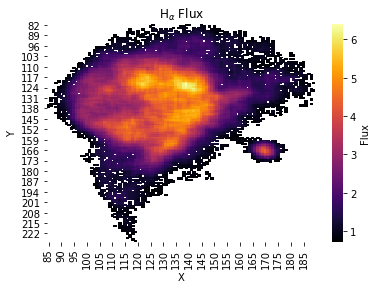

In [12]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
#fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('H$_{α}$ Flux')
#plt.savefig('TAURUS/Imgs/A/'+reg+'FH.png')

Text(0.84, 0.14, '20 pc')

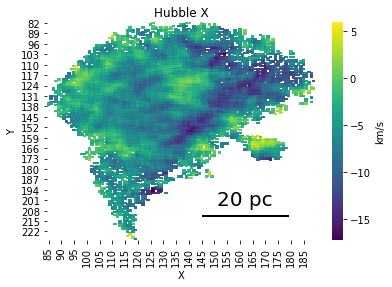

In [13]:
fig = plt.figure()
ax = fig.add_subplot()

datal=data.copy()

dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})

plt.title('Hubble X')

plt.axhline(y=130, xmin=0.58, xmax=0.90, linewidth=2, color = 'k')

ax.text(0.84, 0.14, '20 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
#plt.savefig('TAURUS/Imgs/A/'+reg+'RVH.png')

Structure function

phd

In [14]:
pc=0.63

1.0


[None, None]

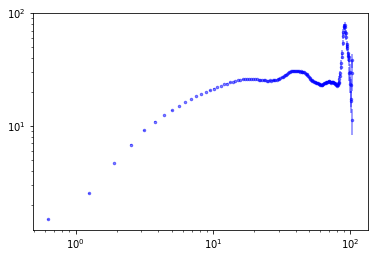

In [15]:
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [16]:
df = SF[['Lag', 'Nmqvd']].copy()
df=df.rename(columns={"Lag": "pc", "Nmqvd": "S"})
df.to_csv('HX.csv',mode = 'w', index=False)

In [17]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([  4.65250645, 101.65788362, 102.13744675])

In [18]:
s=SFr[0]

In [19]:
ss=np.round((data['RV'].std())**2,2)

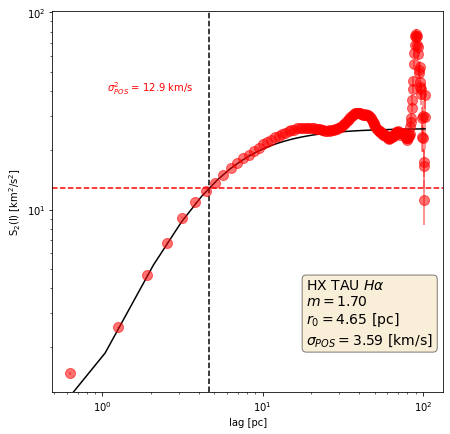

In [20]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.7

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('HX TAU ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

Dr. Will

In [21]:
sb=np.array(dataH_f)

In [22]:
vv=np.array(dataH_rv)

In [23]:
# Replace spurious values in the arrays
m = ~np.isfinite(sb*vv) | (sb < 0.0)
sb[m] = 0.0
vv[m] = np.nanmean(vv)
sb /= sb.max()

<ipython-input-23-3dde98feae8a>:2: RuntimeWarning: invalid value encountered in less
  m = ~np.isfinite(sb*vv) | (sb < 0.0)


In [24]:
rslt = strucfunc.strucfunc_numba_parallel(vv, wmap=sb, dlogr=0.15)

In [25]:
good = (~m) & (sb > 0.001)
rslt["Unweighted mean velocity"] = np.mean(vv[good])
rslt["Unweighted sigma^2"] = np.var(vv[good])
v0w = rslt["Weighted mean velocity"] = np.average(vv, weights=sb)
rslt["Weighted sigma^2"] = np.average((vv - v0w)**2, weights=sb)

In [26]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [27]:
jsonfilename = "HXsfh.json"
with open(jsonfilename, "w") as f:
    json.dump(rslt, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

HXsfh.json

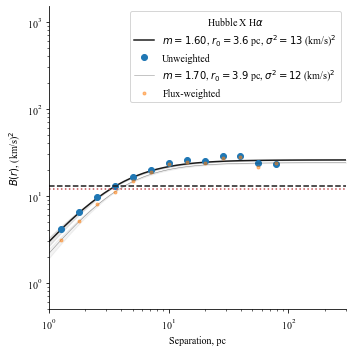

In [28]:
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

def bfunc(r, r0, sig2, m):
    "Theoretical structure function"
    C = 1.0 / (1.0 + (r/r0)**m)
    return 2.0*sig2*(1 - C)

datax = json.load(open("HXsfh.json"))

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(5, 5))

figfile = "HX.pdf"

pixscale = 0.26 # arcsec
pixscale *= 2.42              # parsec
r = pixscale * 10**np.array(datax["log10 r"])
B = np.array(datax["Unweighted B(r)"])
sig2 = datax["Unweighted sigma^2"]
B_w = np.array(datax["Weighted B(r)"])
sig2_w = datax["Weighted sigma^2"]

# Plot fit to unweighted strucfunc
rgrid = pixscale * np.logspace(0.0, 2.7)
r0 = np.interp(sig2, B, r)
m = 1.6
flabel = rf"$m = {m:.2f}$, $r_0 = {r0:.1f}$ pc, $\sigma^2 = {sig2:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0, sig2, m - 0.1),
    bfunc(rgrid, r0, sig2, m + 0.1),
    color="k", alpha=0.1,
)
ax.plot(rgrid, bfunc(rgrid, r0, sig2, m), color="k", label=flabel)

# Plot points from unweighted strucfunc
ax.plot(r, B, 'o', label="Unweighted")


# Plot fit to weighted strucfunc
r0_w = np.interp(sig2_w, B_w, r)
m_w = 1.7
flabel_w = rf"$m = {m_w:.2f}$, $r_0 = {r0_w:.1f}$ pc, $\sigma^2 = {sig2_w:.0f}$ (km/s)$^2$"
ax.fill_between(
    rgrid,
    bfunc(rgrid, r0_w, sig2_w, m_w - 0.1),
    bfunc(rgrid, r0_w, sig2_w, m_w + 0.1),
    color="k", alpha=0.05,
)
ax.plot(rgrid, bfunc(rgrid, r0_w, sig2_w, m_w), lw=0.5, color="k", alpha=0.5, label=flabel_w)

# Plot points from weighted strucfunc
ax.plot(r, B_w, 'o', ms=3, alpha=0.5, label="Flux-weighted")


#melnick_r = np.array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5])
#melnick_B = np.array([2.0, 2.1, 2.2, 2.2, 2.25, 2.25]) * 18.2**2
#ax.plot(melnick_r, melnick_B, 's', label="Melnick+ (2020)", color="y", zorder=-10)


ax.axhline(sig2, color="k", ls="--")
ax.axhline(sig2_w, color="r", ls=":")
ax.legend(title=r"Hubble X H$\alpha$")
ax.set(
    xscale = "log",
    yscale = "log",
    ylim  = [0.5, 1500],
    xlim  = [1, 300],
    xlabel = "Separation, pc",
    ylabel = r"$B(r)$, (km/s)$^2$",
)
fig.tight_layout()
sns.despine()
fig.savefig(figfile)
fig.savefig(figfile.replace(".pdf", ".jpg"))

Delta Variance

In [29]:
hdul = fits.open('Obs/HXRV.fits')
vmed = np.nanmedian(hdul[0].data)
m = np.isfinite(hdul[0].data)
hdul[0].data[~m] = vmed

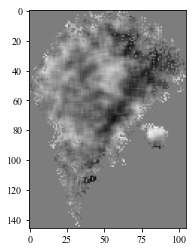

In [30]:
plt.imshow(hdul[0].data, cmap='gray')

In [31]:
dvar = tss.DeltaVariance(hdul[0])

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            WLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     20.36
Date:                Wed, 05 May 2021   Prob (F-statistic):           0.000157
Time:                        11:32:30   Log-Likelihood:                 15.555
No. Observations:                  25   AIC:                            -27.11
Df Residuals:                      23   BIC:                            -24.67
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9566      0.088    -10.865      0.0

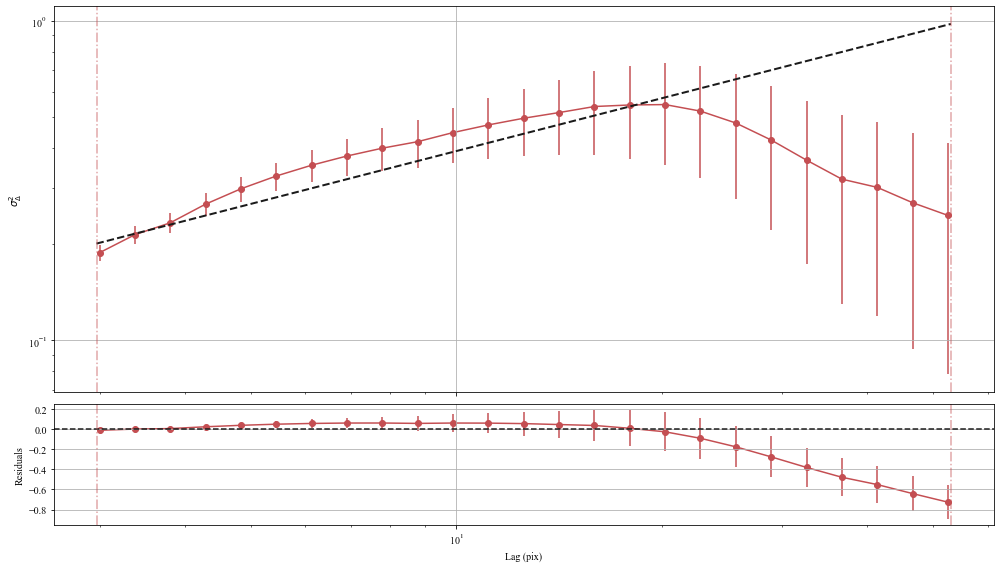

In [32]:
plt.figure(figsize=(14, 8))
dvar.run(verbose=True)

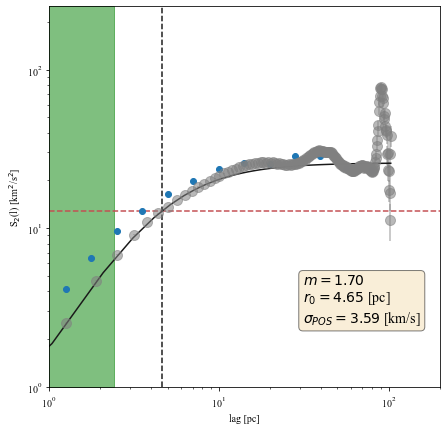

In [33]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="gray", ecolor="gray",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
#ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')

ax.plot(r, B, 'o', label="Unweighted")


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.7

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join((r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

ax.set_xlim(1, 200)
ax.set_ylim(1, 250)

xs=np.linspace(1,2.4,10)
ys=np.linspace(1,2.4,10)

ax.fill_between(xs, 0, 1, where=ys > 0.5,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

fig.savefig('HX.pdf', bbox_inches='tight')

PDF/CDF

In [34]:
sb /= np.nanmean(sb)

In [35]:
header=0

In [36]:
input_data = (sb, header) 

In [37]:
pdf_mom0 = tss.PDF(input_data, min_val=0.0, bins=None)

Optimization terminated successfully.
         Current function value: 1.503126
         Iterations: 21
         Function evaluations: 42
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -10409.
Model:                     Likelihood   AIC:                         2.082e+04
Method:            Maximum Likelihood   BIC:                         2.084e+04
Date:                Wed, 05 May 2021                                         
Time:                        11:32:33                                         
No. Observations:                6925                                         
Df Residuals:                    6923                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

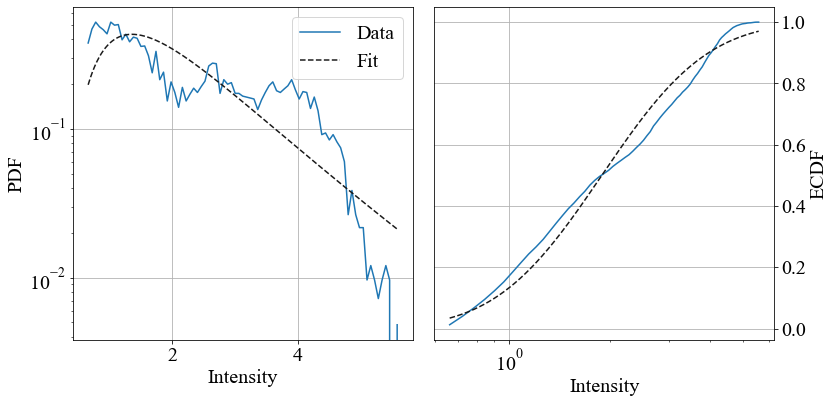

In [38]:
plt.figure(figsize=(12, 6))
pdf_mom0.run(verbose=True)

In [39]:
from scipy.stats import lognorm
import seaborn as sns
sns.set_color_codes()
sns.set_context("talk")

In [40]:
LN = lognorm(s=1.0, scale=np.exp(1.0))

[None]

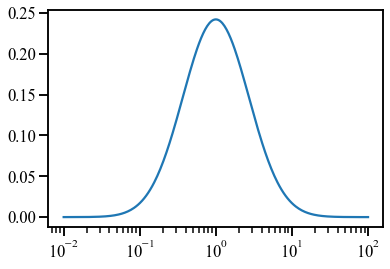

In [41]:
x = np.logspace(-2.0, 2.0, 300)
fig, ax = plt.subplots()
ax.plot(x, LN.pdf(x))
ax.set(xscale="log")

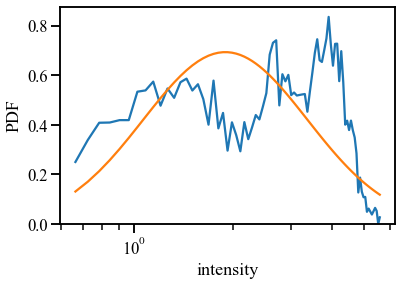

In [42]:
fig, ax = plt.subplots()
s, scale = pdf_mom0.model_params
LN = lognorm(s=s, scale=scale)
x = pdf_mom0.bins
ax.plot(x, x*pdf_mom0.pdf)
ax.plot(x, x*LN.pdf(x))
ax.set(
    xlabel="intensity",
    ylabel="PDF",
    xscale="log",
    ylim=[0, None],
);

In [43]:
pdf_mom0.model_params

array([0.57507141, 1.89164866])

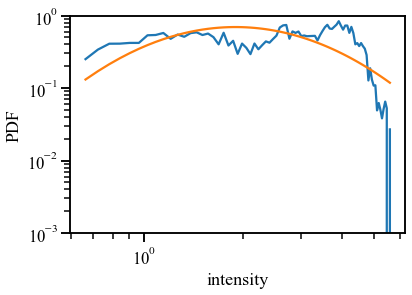

In [44]:
fig, ax = plt.subplots()
ax.plot(x, x*pdf_mom0.pdf)
ax.plot(x, x*LN.pdf(x))
ax.set(
    xlabel="intensity",
    ylabel="PDF",
    xscale="log",
    yscale="log",
    ylim=[1e-3, 1.0],
);

Optimization terminated successfully.
         Current function value: 2.833722
         Iterations: 24
         Function evaluations: 49
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:                -19624.
Model:                     Likelihood   AIC:                         3.925e+04
Method:            Maximum Likelihood   BIC:                         3.927e+04
Date:                Wed, 05 May 2021                                         
Time:                        11:32:34                                         
No. Observations:                6925                                         
Df Residuals:                    6923                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

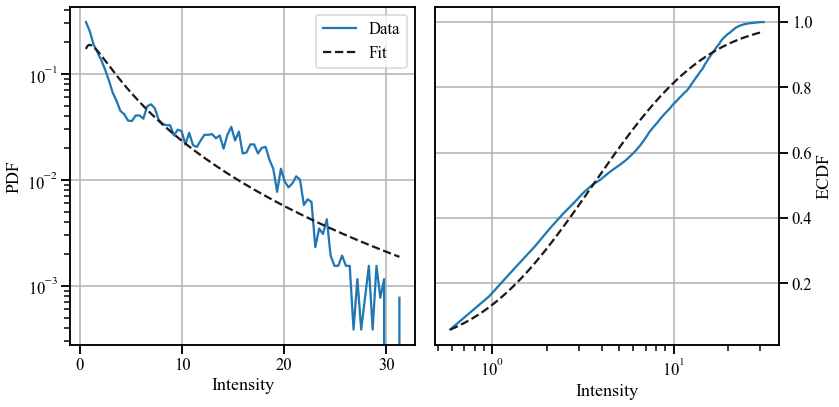

In [45]:
wpdf_mom0 = tss.PDF(input_data, min_val=0.0, weights=sb)
plt.figure(figsize=(12, 6))
wpdf_mom0.run(verbose=True)

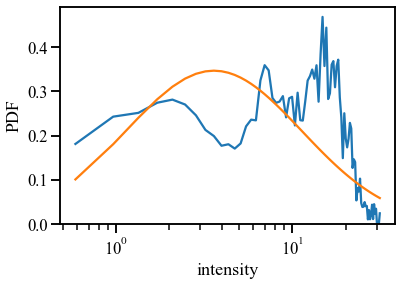

In [46]:
fig, ax = plt.subplots()
s, scale = wpdf_mom0.model_params
LN = lognorm(s=s, scale=scale)
x = wpdf_mom0.bins
ax.plot(x, x*wpdf_mom0.pdf)
ax.plot(x, x*LN.pdf(x))
ax.set(
    xlabel="intensity",
    ylabel="PDF",
    xscale="log",
    ylim=[0, None],
);

In [47]:
wpdf_mom0.model_params

array([1.15014283, 3.57833465])

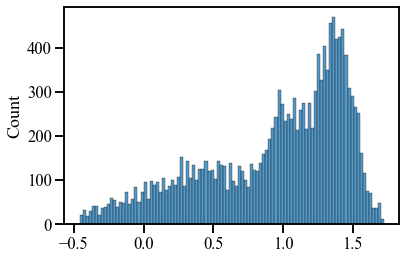

In [48]:
m = np.isfinite(sb) & (sb > 0.0)
sns.histplot(x=np.log(sb[m]), kde=False, weights=sb[m].astype(float), bins=100)

In [49]:
H, edges = np.histogram(np.log(sb[m]), weights=sb[m], bins=100, range=[-4.0, 2.5], density=True)

[Text(0, 0.5, 'PDF'), Text(0.5, 0, '$\\ln (S/S_0)$')]

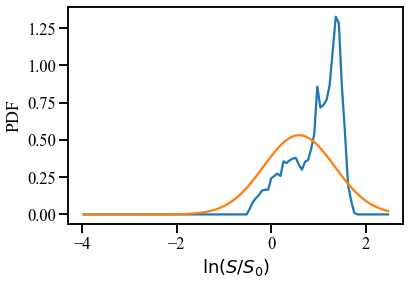

In [50]:
fig, ax = plt.subplots()
centers = 0.5*(edges[:-1] + edges[1:])
ax.plot(centers, H)
LN = lognorm(s=0.75,scale=1.8)
ax.plot(centers, np.exp(centers)*LN.pdf(np.exp(centers)))
ax.set(
    xlabel="$\ln (S/S_0)$",
    ylabel="PDF",
#    yscale="log",
#    ylim=[1e-3, 1.0],
)

[Text(0, 0.5, 'CDF'), Text(0.5, 0, '$\\ln (S/S_0)$')]

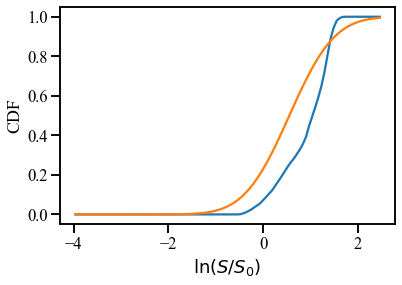

In [51]:
cdf = np.cumsum(H)*(centers[1] - centers[0])
fit = np.exp(centers)*LN.pdf(np.exp(centers))
cdf_fit = np.cumsum(fit)*(centers[1] - centers[0])

fig, ax = plt.subplots()
ax.plot(centers, cdf)
ax.plot(centers, cdf_fit)
ax.set(
    xlabel="$\ln (S/S_0)$",
    ylabel="CDF",
#    yscale="log",
#    ylim=[1e-3, 1.0],
)

[None,
 (0.0003333333333333333, 3000.0),
 Text(0, 0.5, 'CDF / (1 $-$ CDF)'),
 Text(0.5, 0, '$\\ln (S/S_0)$')]

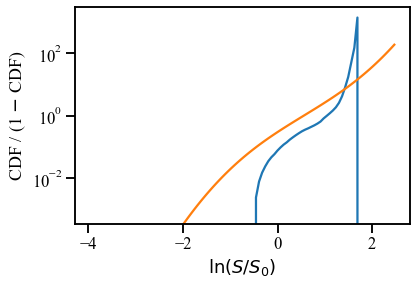

In [52]:
fig, ax = plt.subplots()
ax.plot(centers, cdf/(1 - cdf))
ax.plot(centers, cdf_fit/(1 - cdf_fit))
ax.set(
    xlabel="$\ln (S/S_0)$",
    ylabel="CDF / (1 $-$ CDF)",
    yscale="log",
    ylim=[1e-3/3, 3e3],
)

In [53]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 182.17211294174194 seconds ---
